<h1><center> Web Scraping and Modeling Runners' Times in the Cherry Blossom Race </center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

### Question to answer
Q.11 Normalize each male runner’s time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess(), and find the smoothed time using predict(). Use these smoothed times to normalize each run time. Use density plots, quantile–quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.

### Introduction

In this Data Era, there are potentials in analyzing data and bringing insights to a problem we have interests in. For instance, to find out whether there is a relationship between physical performance and aging and what the relationship is, road races data can be the data we could do analysis on. This kind of data is collected by the race organizers and it is at individual level. Data is often published on the Web. We can bring some insights to the question we have interests in. 

Cherry Blossom Ten Mile Run is one of the annual race held in Washington D.C. early April which the cherry blossom is blooming around this time. This race run started in 1973 as a training run for runners planning to compete in Boston Marathon. Its participants range from age 9 to 89. The organizer publish the results at http://www.cherryblossom.org/. The data published provides a very helpful resource including name, sex, hometown and final time of participants for us to learn the relationship between physical performance and aging.

The original analysis was provided by the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. The data has been already web-scraped and it has results from all years from 1999 to 2012. The data is divided by genders meaning MenTxt for men and WomenTxt for women. 

To answer the above questions, we are using the data for each gender. 

Resources: Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving

### Methods

### Data Import and Exploration

Based on the initial data import in the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving, this process can be challenging due to the data format changing over time. Let us start off reading the raw file by using readLines() function.


# BOOKS INITIAL CODE

- will start changing in next push

- reading the data from 2012 male runners

In [1]:
els = readLines("MenTxt/2012.txt")
els[1:10]
eqIndex = grep("^===", els)
eqIndex

[1] ""                                                                                              
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                     
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                     
 [4] ""                                                                                              
 [5] "                Official Male Results (Sorted By Net Time)"                                    
 [6] ""                                                                                              
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== "
 [9] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
[10] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "

[1] 8

- reading the data from 2011 male runners to compare them
- the data format is not the same over time aka data format changes
- here is the findings from the book

    • Both of the tables have a header.
    
    • The last line of the header is a row of ‘=’ characters, i.e., a separation line.
    
    • There are blanks inserted in the row of ‘=’ characters that mark the start and end of a column of information, e.g., the Pace column occupies 5 spaces.
    
    • The row above the ‘=’ characters gives column names.
    
    • There are two times reported in 2011 (called Gun Tim and Net Tim) and only one time reported in 2012 (Time). The header of the 2012 file tells us that Time is net time.

In [2]:
els = readLines("MenTxt/2012.txt")

els[1:10]

els2011 = readLines("MenTxt/2011.txt")
els2011[1:10]

first3 = substr(els, 1, 3)
which(first3 == "===")

spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[ -(1:eqIndex) ]

headerRow = tolower(headerRow)
headerRow

[1] ""                                                                                              
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                     
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                     
 [4] ""                                                                                              
 [5] "                Official Male Results (Sorted By Net Time)"                                    
 [6] ""                                                                                              
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== "
 [9] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
[10] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "

[1] ""                                                                                                      
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                             
 [3] "                 Washington, DC     Sunday, April 3, 2011"                                             
 [4] ""                                                                                                      
 [5] "                           Official Male Results"                                                      
 [6] ""                                                                                                      
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Gun Tim Net Tim Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ======= ===== "
 [9] "    1     1/401        3 Lelisa Desisa          21 Ethiopia                       45:36   45:36  4:34 "
[10] "    2     2/401       13 Allan Kiprono          21 Kenya                  23:08   45:41   45:41  4:35 "

[1] 8

[1] "place div  /tot   num    name                   ag hometown             5 mile  time    pace  "

- Runners age 

In [3]:
ageStart = regexpr("ag", headerRow)
ageStart

age = substr(body, start = ageStart, stop = ageStart + 1)
head(age)

summary(as.numeric(age))

blankLocs = gregexpr(" ", spacerRow)
blankLocs

searchLocs = c(0, blankLocs[[1]])

[1] 49
attr(,"match.length")
[1] 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] "22" "23" "36" "27" "24" "31"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

[[1]]
[1]  6 18 25 48 51 72 80 88 94
attr(,"match.length")
[1] 1 1 1 1 1 1 1 1 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [4]:

Values = mapply(substr, list(body), 
                start = searchLocs[ -length(searchLocs)] + 1, 
                stop = searchLocs[ -1 ] - 1)

findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [5]:

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}


In [6]:

searchLocs = findColLocs(spacerRow)
ageLoc = selectCols("ag", headerRow, searchLocs) 
ages = mapply(substr, list(body), 
              start = ageLoc[1,], stop = ageLoc[2, ])

summary(as.numeric(ages))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

In [7]:

shortColNames = c("name", "home", "ag", "gun", "net", "time")

locCols = selectCols(shortColNames, headerRow, searchLocs)

Values = mapply(substr, list(body), start = locCols[1, ], 
                stop = locCols[2, ])

class(Values)
colnames(Values) = shortColNames
head(Values)

[1] "matrix"

name,home,ag,gun,net,time
Allan Kiprono,Kenya,22,NA,NA,45:15
Lani Kiplagat,Kenya,23,NA,NA,46:28
John Korir,Kenya,36,NA,NA,47:33
Ian Burrell,Tucson AZ,27,NA,NA,47:34
Jesse Cherry,Blowing Rock NC,24,NA,NA,47:40
Ketema Nugusse,Ethiopia,31,NA,NA,47:50


In [8]:
tail(Values)[ , 1:3]

,name,home,ag
"[7188,]",Dana Brown,Randallstown MD,41
"[7189,]",Jurek Grabowski,Fairfax VA,39
"[7190,]",Larry Hume,Arlington VA,56
"[7191,]",Sean-Patrick Alexander,Alexandria VA,35
"[7192,]",Joseph White,Forestville MD,
"[7193,]",Lee Jordan,Herndon VA,48


In [9]:

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [10]:

mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

menResMat = lapply(menFiles, extractVariables)
length(menResMat)

sapply(menResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3017 3622 3724 3948 4156 4327 5237 5276 5905 6651 6911 7011 7193

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

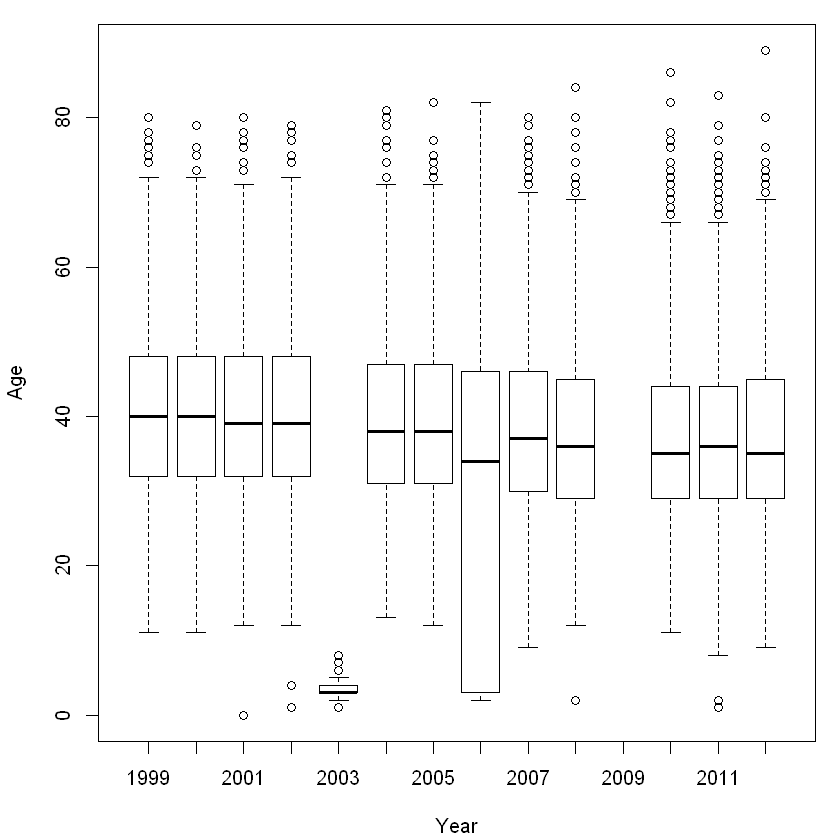

In [11]:

age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))


#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

In [12]:

head(menFiles[['2003']])

menFiles[['2006']][2200:2205]

[1] ""                                                                                             
[2] "Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim "
[3] "===== ========= ===== ============================= == =================== =======  ======= " 
[4] "    1    1/1999     6  John Korir                    27  KEN                  46:56#   46:55 "
[5] "    2    2/1999     1  Reuben Cheruiyot              28  KEN                  47:03#   47:02 "
[6] "    3    3/1999     8  Gilbert Okari                 24  KEN                  47:07#   47:07 "

[1] " 2192 1263/2892   1475 Matt Curtis            39 Vienna          1:27:08 1:27:40   8:46   "
[2] " 2193  94/279    1437 Joe McCloskey          59 Columbia        1:27:01 1:27:40   8:46   " 
[3] " 2194 257/590    7062 Donald Hofmann         48 Princeton Junct 1:25:45 1:27:41   8:47   " 
[4] " 2195 1264/2892   7049 Claudio Petruzziello   23 Princeton Jct   1:25:45 1:27:41   8:47   "
[5] " 2196 339/746    3319 Robert Morrison        40 South Boston    1:23:54 1:27:41   8:47   " 
[6] " 2197 1265/2892   9345 Larry Cooper           32 Arlington       1:26:42 1:27:41   8:47   "

In [13]:

selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

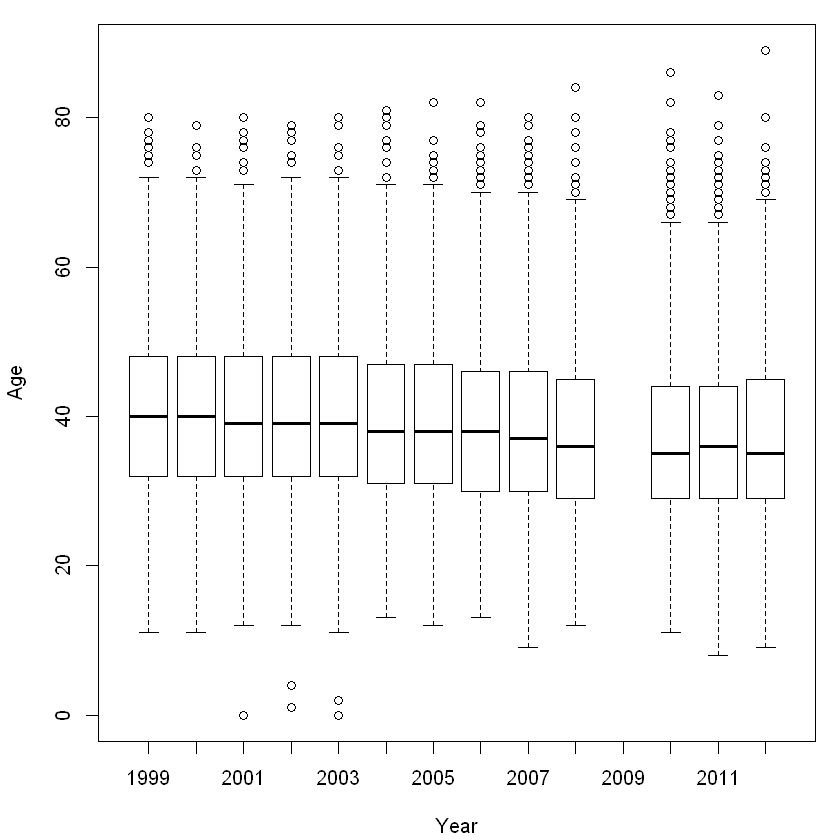

In [14]:

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYrRevised.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
boxplot(age, ylab = "Age", xlab = "Year")
par(oldPar)
#dev.off()


In [15]:

sapply(age,  function(x) sum(is.na(x)))

age2001 = age[["2001"]]

grep("^===", menFiles[['2001']])

badAgeIndex = which(is.na(age2001)) + 5
menFiles[['2001']][ badAgeIndex ]
 
badAgeIndex

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1   61    3    2    0   13    2    5    0 6651    6    0    1

[1] 5

[1] "             "                                                    
 [2] "                              "                                   
 [3] "                      "                                           
 [4] ""                                                                 
 [5] "                         "                                        
 [6] ""                                                                 
 [7] ""                                                                 
 [8] ""                                                                 
 [9] "             "                                                    
[10] "                              "                                   
[11] "                      "                                           
[12] ""                                                                 
[13] "                         "                                        
[14] ""                                                                 
[15] ""                                                                 
[16] ""                                                                 
[17] "             "                                                    
[18] "                              "                                   
[19] "                      "                                           
[20] ""                                                                 
[21] "                         "                                        
[22] ""                                                                 
[23] ""                                                                 
[24] ""                                                                 
[25] ""                                                                 
[26] "    "                                                             
[27] "         "                                                        
[28] ""                                                                 
[29] "            "                                                     
[30] ""                                                                 
[31] ""                                                                 
[32] ""                                                                 
[33] ""                                                                 
[34] "             "                                                    
[35] "                              "                                   
[36] "                      "                                           
[37] ""                                                                 
[38] "                         "                                        
[39] ""                                                                 
[40] ""                                                                 
[41] ""                                                                 
[42] "             "                                                    
[43] "                              "                                   
[44] "                      "                                           
[45] ""                                                                 
[46] "                         "                                        
[47] ""                                                                 
[48] ""                                                                 
[49] ""                                                                 
[50] ""                                                                 
[51] ""                                                                 
[52] ""                                                                 
[53] "             "                                                    
[54] "                              "                                   
[55] "                      "                              

[1] 1756 1757 1758 1759 1760 1761 1762 1763 1814 1815 1816 1817 1818 1819 1820
[16] 1821 1872 1873 1874 1875 1876 1877 1878 1879 1930 1931 1932 1933 1934 1935
[31] 1936 1937 2538 2539 2540 2541 2542 2543 2544 2545 2546 2897 2898 2899 2900
[46] 2901 2902 2903 2904 2955 2956 2957 3008 3009 3010 3011 3012 3013 3014 3015
[61] 3627

In [16]:

extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}

In [17]:

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

which(age2001 < 5)

menFiles[['2001']][ which(age2001 < 5) + 5 ]

charTime = menResMat[['2012']][, 'time']
head(charTime, 5)

tail(charTime, 5)

timePieces = strsplit(charTime, ":")

timePieces[[1]]

tail(timePieces, 1)

timePieces = sapply(timePieces, as.numeric)

runTime = sapply(timePieces, 
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })

summary(runTime)


[1] 1377 3063 3112

[1] " 1377  5629 Steve PINKOS           0 Washington DC      1:20:07 1:22:34"
[2] " 3003  5033 Jeff LAKE              0 Clarksville MD     1:39:26 1:41:22"
[3] " 3052  5637 Greg RHODE             0 Washington DC      1:37:14 1:42:13"

[1] "  45:15 " "  46:28 " "  47:33 " "  47:34 " "  47:40 "

[1] "2:27:11 " "2:27:20 " "2:27:30 " "2:28:58 " "2:30:59 "

[1] "  45" "15 "

[[1]]
[1] "2"   "30"  "59 "

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.43   97.78  150.98 

In [18]:

convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [19]:

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

warnings()[ c(1:2, 49:50) ]

sapply(menDF, function(x) sum(is.na(x$runTime)))

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

NULL

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232   83    0 6649   68    0    0

In [20]:

createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}


In [21]:

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

sapply(menDF, function(x) sum(is.na(x$runTime)))

separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

menResMat = sapply(menFiles, extractVariables)
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232    0    0 6649    0    0    0

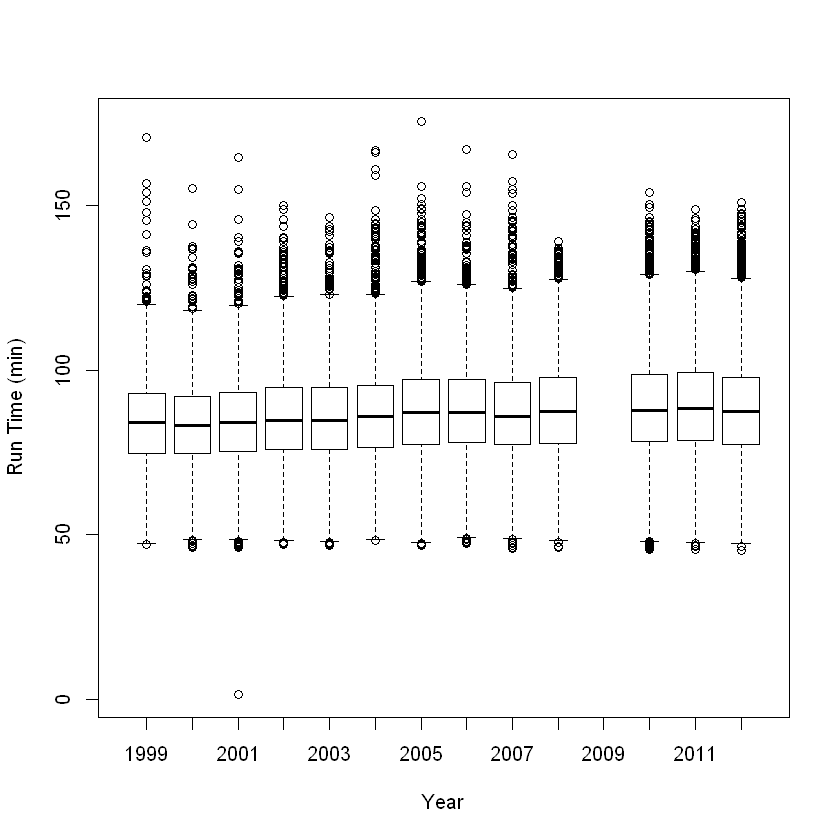

In [22]:

#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()


In [23]:

cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen)

[1] 70070     6

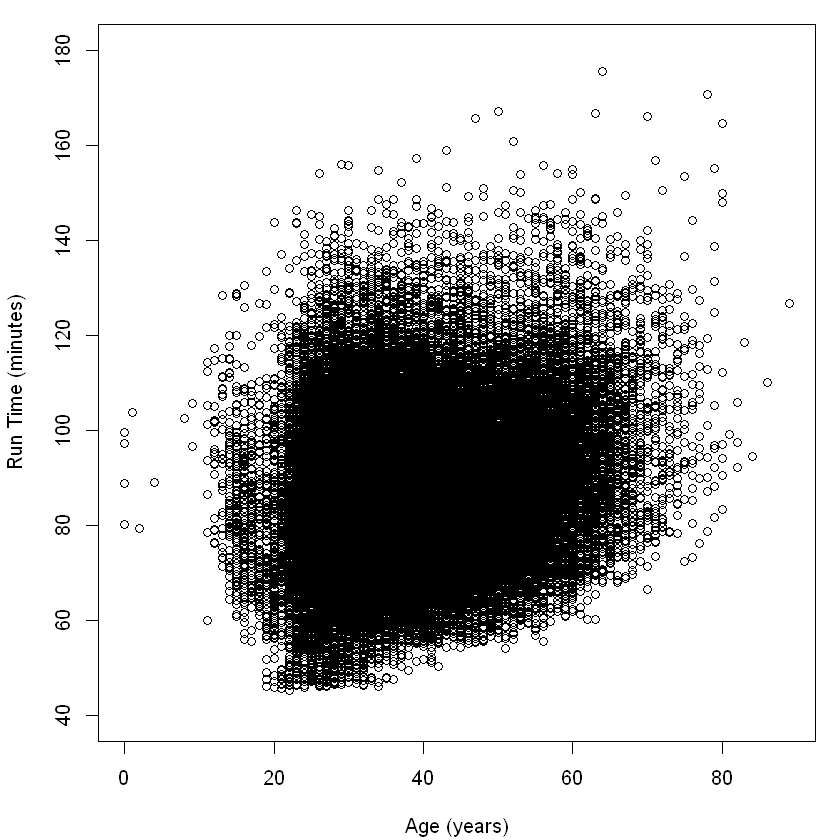

In [24]:

load("cbMen.rda")

#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

[1] "#54278F"

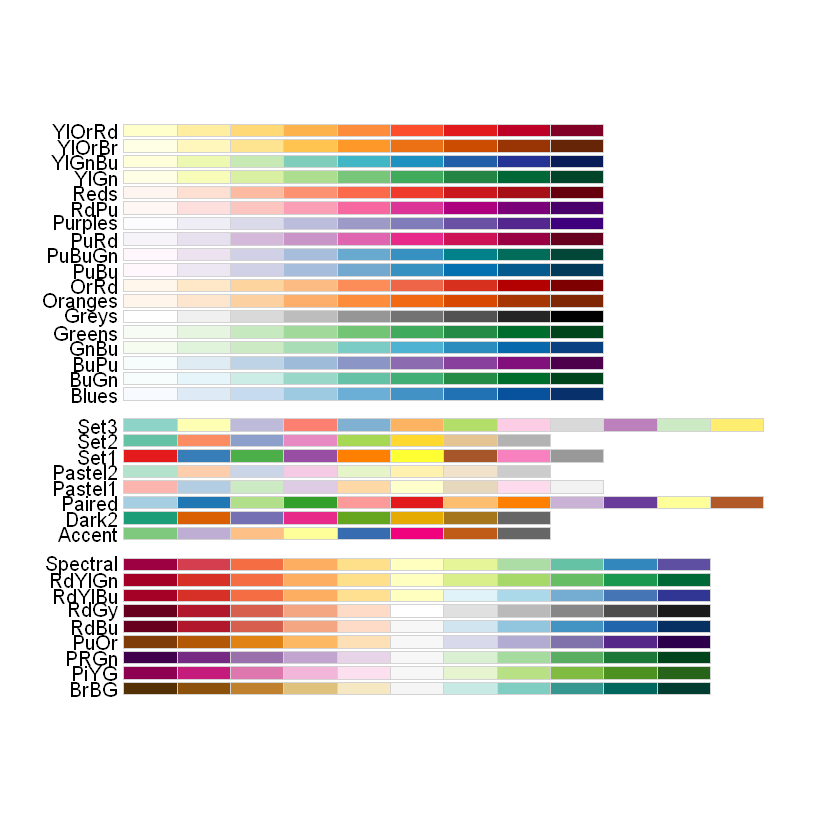

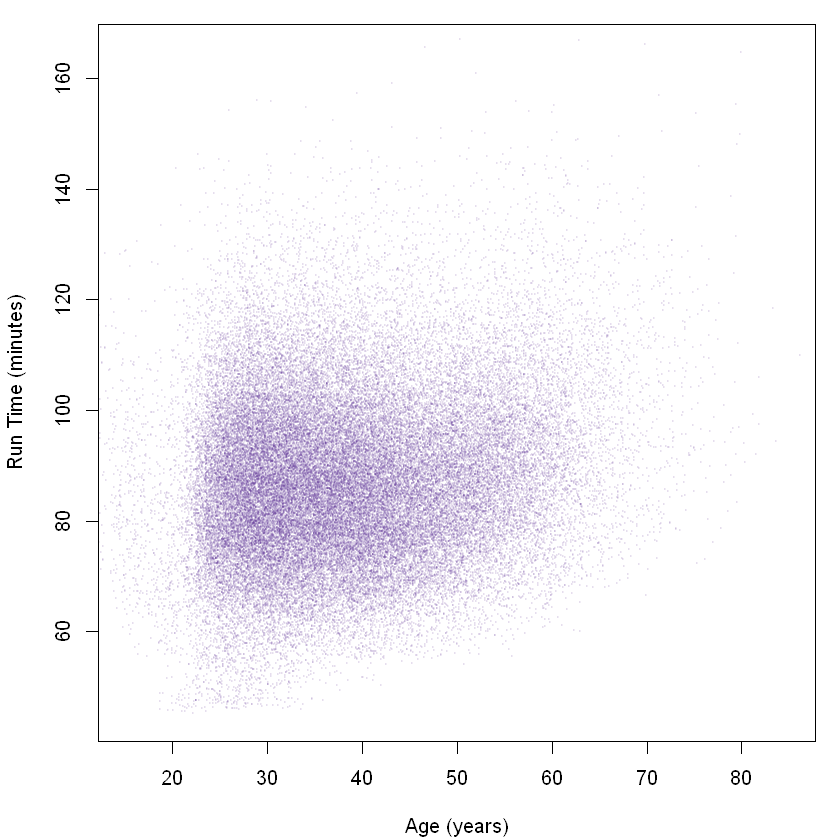

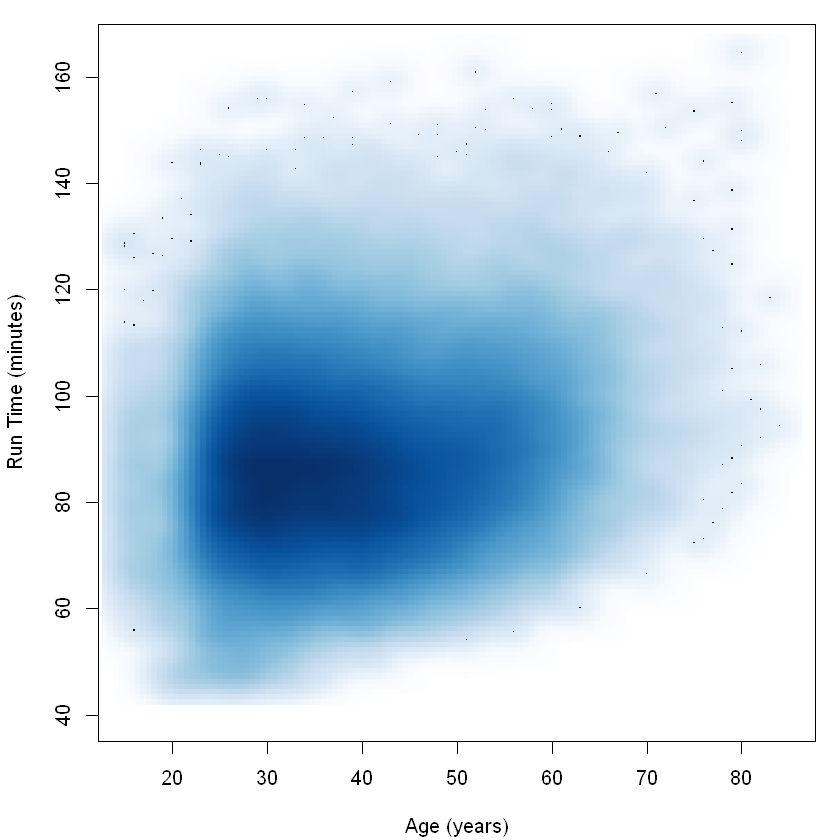

In [25]:

library(RColorBrewer)
ls("package:RColorBrewer")

display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

#pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
#dev.off()

#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5154   22772   18687   11216    4607     679      64 

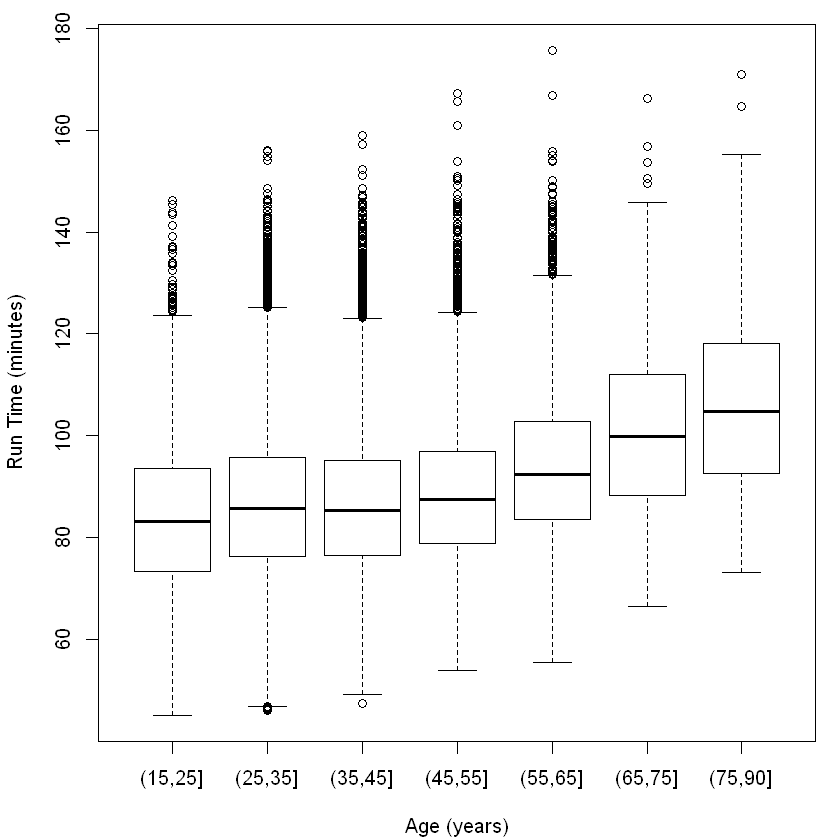

In [26]:

cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

(Intercept)         age 
 78.5886239   0.2259324


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.187 -10.209  -0.954   9.075  82.552 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 78.588624   0.218726  359.30   <2e-16 ***
age          0.225932   0.005427   41.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.75 on 63177 degrees of freedom
Multiple R-squared:  0.0267,	Adjusted R-squared:  0.02668 
F-statistic:  1733 on 1 and 63177 DF,  p-value: < 2.2e-16


[1] "lm"

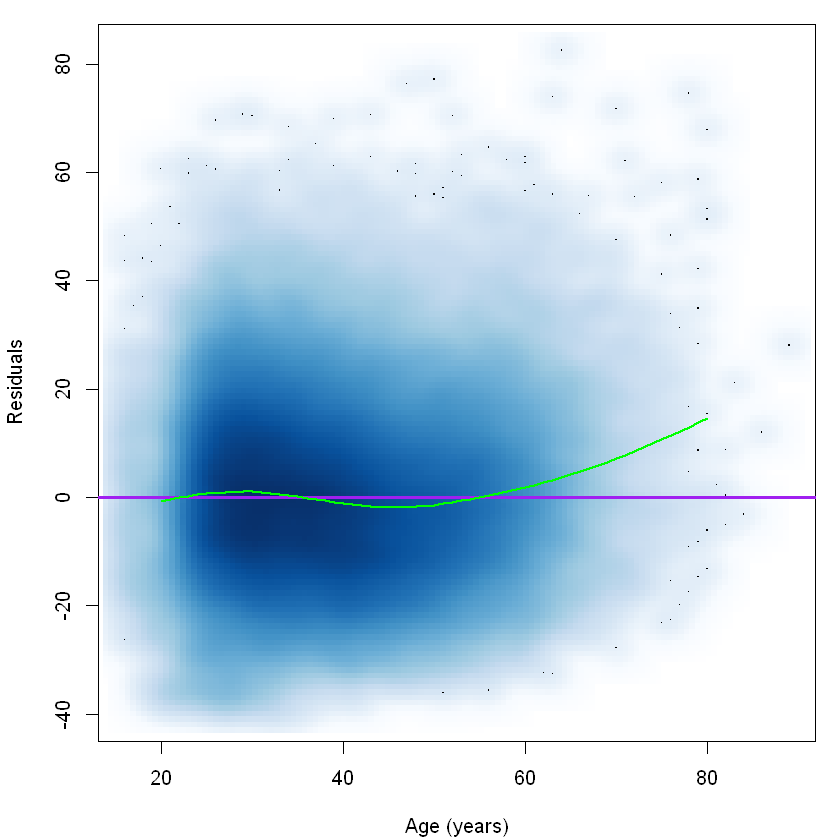

In [27]:

lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

summary(lmAge)

class(lmAge)

#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

age20to80 = 20:80

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
#dev.off()

In [28]:

menRes.lo = loess(runTime ~ age, cbMenSub)

menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)

lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

summary(lmOver50)

decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

summary(lmPiecewise)


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.129 -10.090  -0.886   9.033  79.211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.683238   0.279324  296.01   <2e-16 ***
age          0.103788   0.007512   13.82   <2e-16 ***
over50       0.572542   0.024457   23.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.69 on 63176 degrees of freedom
Multiple R-squared:  0.03507,	Adjusted R-squared:  0.03504 
F-statistic:  1148 on 2 and 63176 DF,  p-value: < 2.2e-16


,over30,over40,over50,over60
63174,36,26,16,6
63175,11,1,0,0
63176,9,0,0,0
63177,26,16,6,0
63178,5,0,0,0
63179,18,8,0,0



Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.522 -10.102  -0.906   9.018  79.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.33159    0.96573  76.969  < 2e-16 ***
age          0.41619    0.03502  11.884  < 2e-16 ***
over30      -0.47210    0.05031  -9.384  < 2e-16 ***
over40       0.23142    0.04259   5.434 5.53e-08 ***
over50       0.47961    0.05518   8.693  < 2e-16 ***
over60       0.03178    0.08097   0.392    0.695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.68 on 63173 degrees of freedom
Multiple R-squared:  0.03642,	Adjusted R-squared:  0.03634 
F-statistic: 477.5 on 5 and 63173 DF,  p-value: < 2.2e-16


In [29]:

overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

tail(overAgeDF)

,age,over30,over40,over50,over60
56,75,45,35,25,15
57,76,46,36,26,16
58,77,47,37,27,17
59,78,48,38,28,18
60,79,49,39,29,19
61,80,50,40,30,20


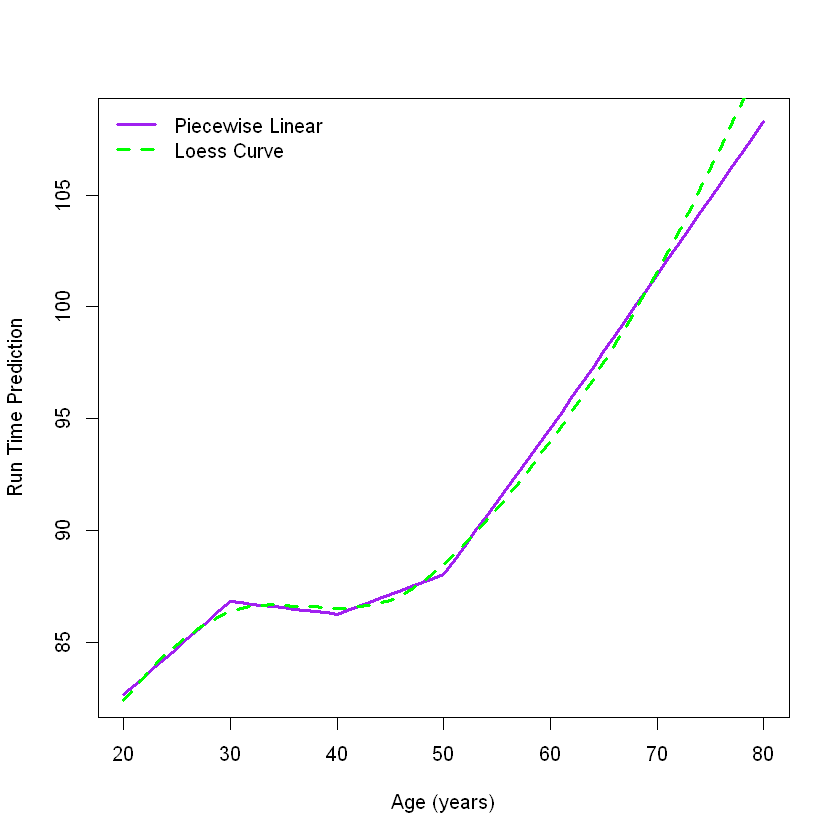

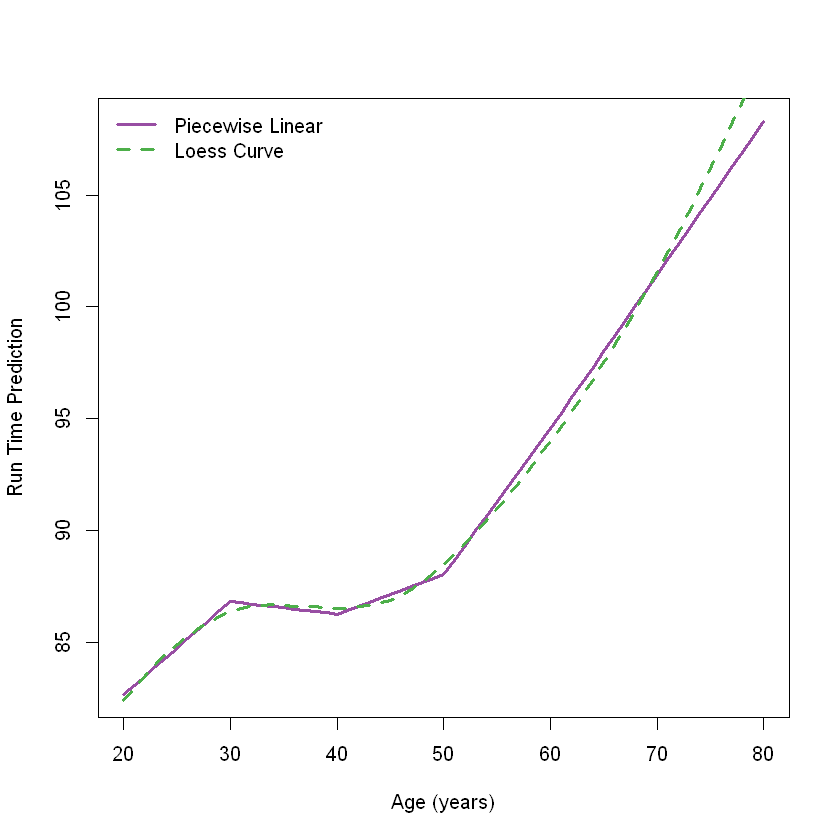

In [30]:

predPiecewise = predict(lmPiecewise, overAgeDF)

plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
#dev.off()


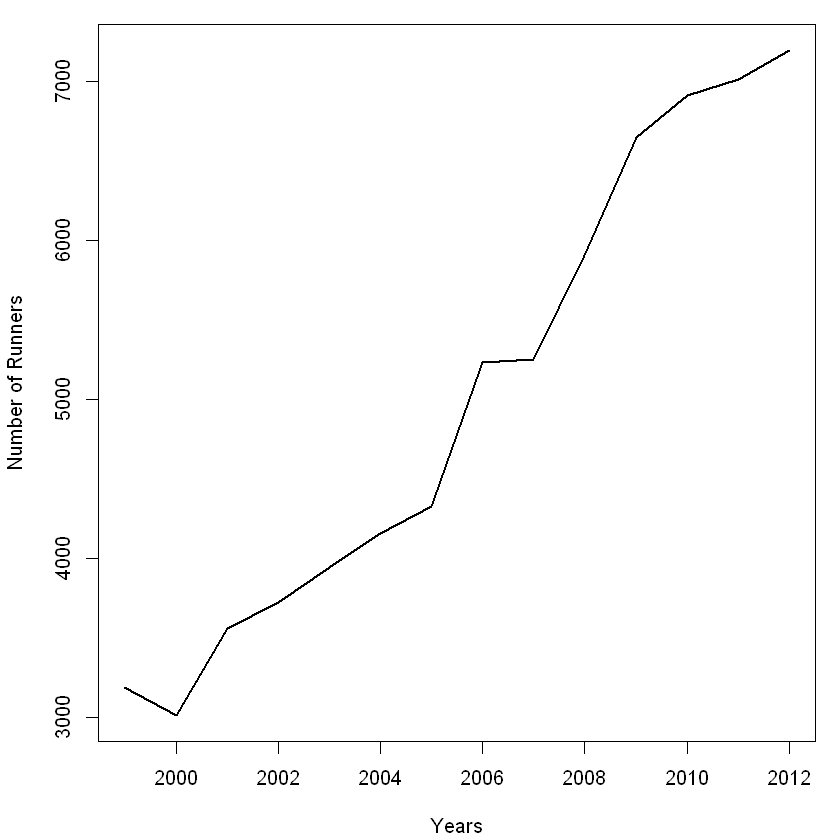

In [31]:

#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
#dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

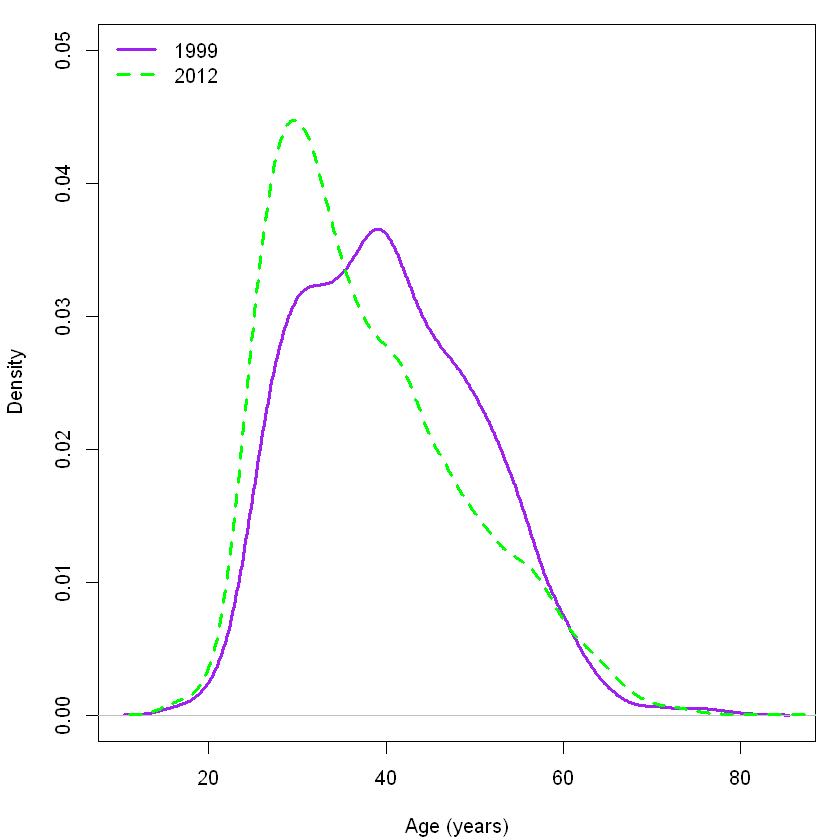

In [32]:

summary(cbMenSub$runTime[cbMenSub$year == 1999])

summary(cbMenSub$runTime[cbMenSub$year == 2012])

#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
#dev.off()

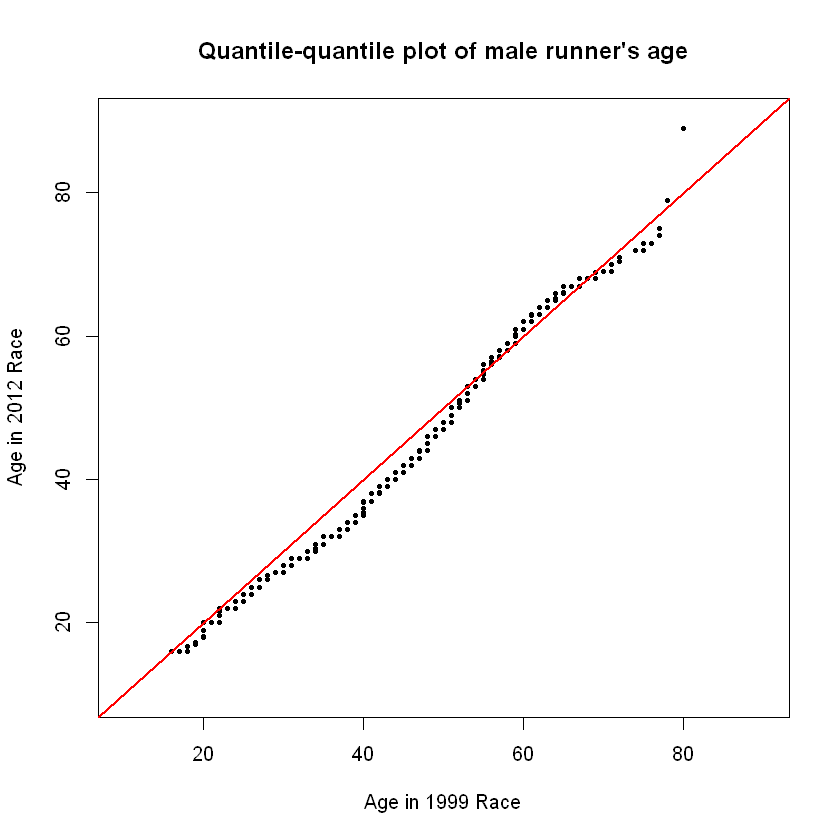

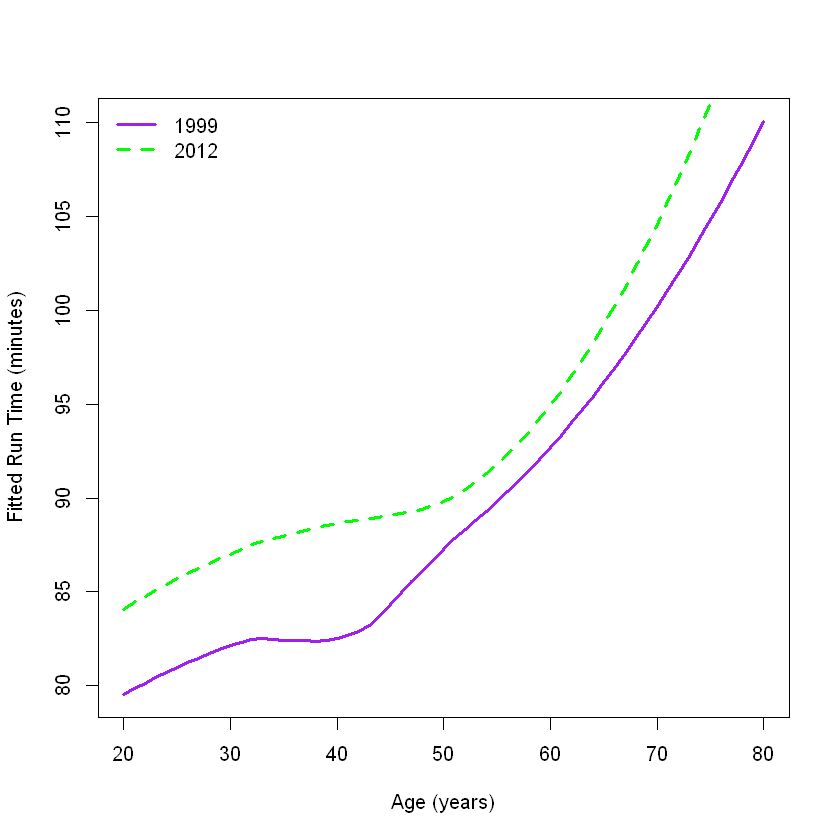

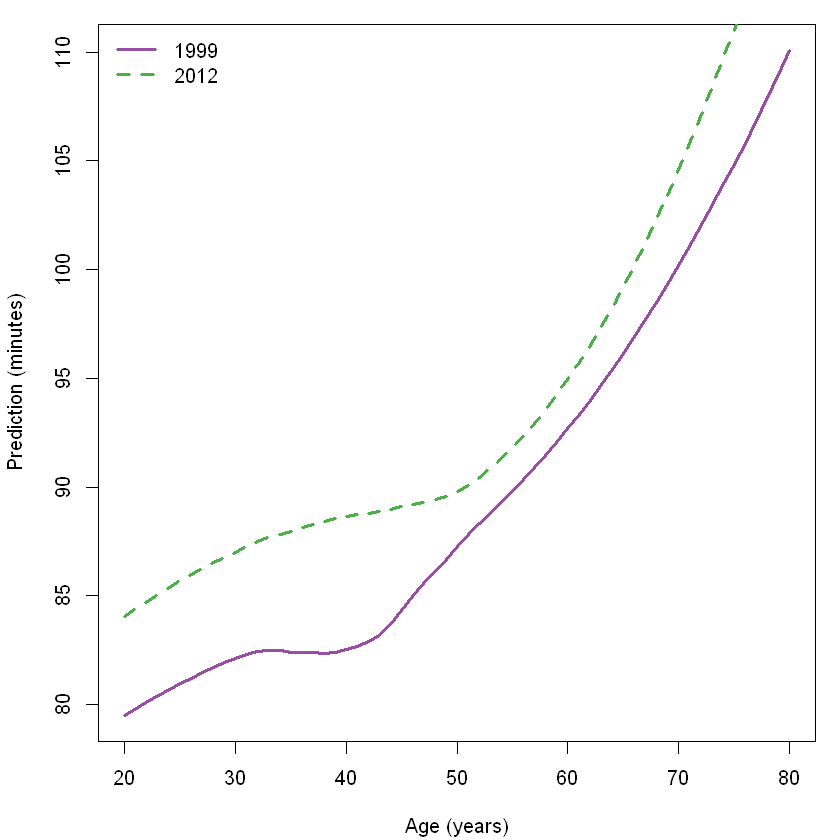

In [33]:

qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")


#pdf("CB_Loess99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")  
lines(x = age20to80, y = mR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")
par(oldPar)
#dev.off()

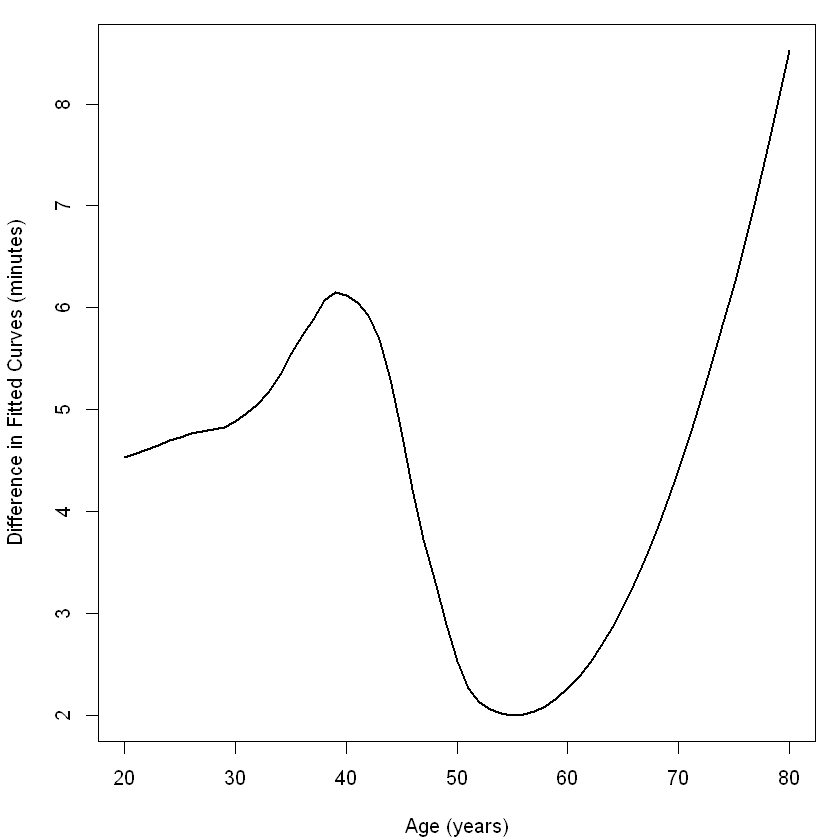

In [34]:

gap14 = mR.lo.pr12 - mR.lo.pr99

#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
#dev.off()

In [35]:

fastestMan = tapply(menRes$time, menRes$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", xlim = c(20, 80))
ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

timeNorm = menRes$time / mR.lo.prF[as.character(menRes$age)]
time99Norm = timeNorm[menRes$year == 1999]
time12Norm = timeNorm[menRes$year == 2012]
summary(time99Norm)

summary(time12Norm)

ERROR: Error in tapply(menRes$time, menRes$age, min, na.rm = TRUE): object 'menRes' not found


In [98]:
#head(menResMat)